# TP - MVA 2024 - AI for IQA

Name: Nageeta Kumari

The objective of this TP is to work on the design of annotation campaigns, en essential part to build IQA (Image Quality Assesment) datasets.

Answer the questions below and then export the notebook with the answers using the menu option File->Download .ipynb. **[Then submit your solution here (add your name to the filename)!](https://docs.google.com/forms/d/e/1FAIpQLScZqOU9T5Fuy021Z5-RXmmXFddjrnEyYX0gLsnPJ3EtV4akkg/viewform?usp=sharing)**

# Part 1 - Designing annotation campaigns to build IQA datasets

> ### Question1: Cite five difficulties encountered when developping an IQA dataset

> #### A1:

1- subjectivity issue (when differnt judgemnets from differnet annotator) in Image quality assements

2- annotation inconsistency in scoring or ranking

3- Collecting images of same quality with same or different content (Content dependence)

4- Bias issue

5- handling natural conditions(outdoor/outside) vs controlled conditions( like indoor in any lab where quality is tested)

-> ### Question2: Cite four annotation methods for image quality

> #### A2:

1. Pairwise comparision
2. Ranking
3. Mean opnion score
4. Ruler method




> ### Question3: For the two most common methods, which one do you think is a better choice? Cite a situation for each method where it is preferable. Answer these questions by citing two pros and two cons of each method and argument your choice of situations.


> #### A3:

Pairwise comparision

- pros:
  - simpler one, annotators only need to decide which of the two is better.
  - results could be stable, since when looking at two images specially when with the same content, they will select one that has more details, less noise, more prominent, more focus on subject.

- cons:
  - can be time consuming, since no of comparision increase (quadratically) with size of data
  -  it can be baised or can provide more variability in results specially if any creteria is not defined.
  - sometimes it might be difficult to decide which one is better when both images has different content/scene and can lead to biased results


Mean opnion score(MOS)

- pros:
  - since it takes mean over the scores by annotators, it provides an estimated score, and can be close to the true values and is not biased.
  - can be fast as compare to pairwise since multiple images can be evaluated at once.
  
- cons
  -  score can be inconsistent if annotators interpret the scale differently that's while need some training to allign scales for all annotators.


From the above two, what i think mean opnion score is better, since it takes less time, and if a all annottaors are alligned for a predetermined scaling, then results of MOS would be better overall, in terms of accuracy and time consumption. or what we can do that instead of a single pass for MOS, we can take more than one pass, and then take average over those to get a score. Also it depends on the task as well, if we need more accurate result we can go with Pairwise comparision, and it we need more efficinet method we can go with MOS.

> ### Q4: Let's now focus on Pairwise comparison methods (PWC) and Mean Opinion Score (MOS). Let's imagine that comparing the quality between two images can take on average 5 seconds (PWC), while evaluating the quality of a single image can take around 15 seconds (MOS). Calculate the necessary time to do a full pass of annotations for one person. What's the total number of data points (comparisons for PWC and evaluations for MOS) for both methods?


> #### A4:

let's assume, we have some 'N' data points so to calcuate MOS and PW comparision:

- MOS: a person has to assign score to each image with reference to set of images 'N', so the total time for MOS would be (15 seconds / 60)* N minutes.

- Pairwise: since we have to compare all possible pairs (n(n-1)/2) pairs, so the total time would be (n(n-1)/2)*5/60 minutes.


> ### Q5: Given an annotation campaign with N images. How does the time spent on the full annotation campaign change for each method? Plot the evolution of the total annotation cost per person (in minutes) in terms of N (1 to 50) for both methods. What is the minimum number of images on which comparisons (PWC) is more costly?


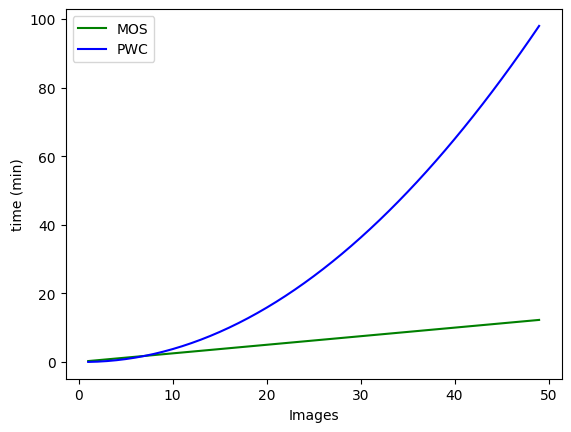

In [1]:
import matplotlib.pyplot as plt
import numpy as np

N=50 #1-50 images
time_for_mos=[(15/60)*n for n in range(1,N)]
time_for_pwc=[(5/60)*(n*(n-1)/2) for n in range(1,N)]
# print(time_for_mos)
# print(time_for_pwc)
plt.plot(np.arange(1,N), time_for_mos, color='green',label='MOS')
plt.plot(np.arange(1,N), time_for_pwc,color='blue',label='PWC')
plt.xlabel("Images")
plt.ylabel("time (min)")
plt.legend()
plt.show()



> A5:

What is the minimum number of images on which comparisons (PWC) is more costly?

I did compare the two formulas, that i have written above for mos and pwc, on n=7 and i found the two method will be equal when N=7 so minimum no where PWC is more costly then MOS would be 8, and from plot we can see that the PWC crosses MOS and increase quadratically after around N=8.

> ### Q6: Redo the plot of Q5 taking into consideration that we need five times more single annotations to reach a similar precision with the comparisons

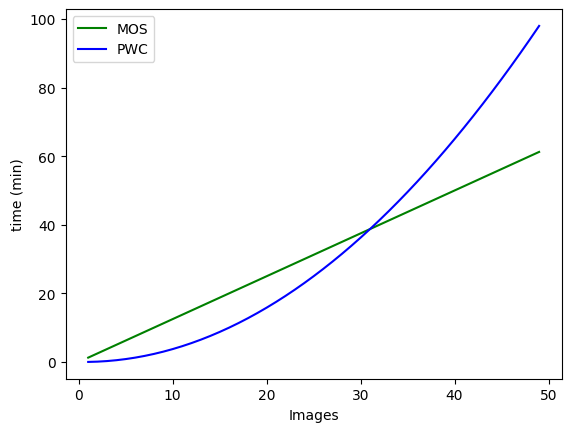

In [2]:
N=50 #1-50 images
updated_mos=5
time_for_mos=[(15/60)*n*updated_mos for n in range(1,N)]
time_for_pwc=[(5/60)*(n*(n-1)/2) for n in range(1,N)]
plt.plot(np.arange(1,N), time_for_mos, color='green',label='MOS')
plt.plot(np.arange(1,N), time_for_pwc,color='blue',label='PWC')
plt.xlabel("Images")
plt.ylabel("time (min)")
plt.legend()
plt.show()

#### A6

As we have seen, the pair wise comparision is more precise then MOS so to reach the same level of the precision, so we are increasing the mean square error (MOS) for 5 more times we can see it as instead of one person to avaluate now we have 5 persons for evaluation. In results we can see that the time for MOS increases(lineraly) as no of images increases, and compare to previous plot, since we now have 5 times more for evaluation so MOS in second plot is higher than first experimnet Plot.

> ### Q7: For big data sets, it is not feasible to do a complete design for all annotators and all images. How can we reduce the number of comparisons without losing much precision?

> #### A7:

- one strategy we study during course, is active sampling, we can use that here.
    - we can use information gain-based sampling techniques to select only the most informative comparisons like :
    - prioritize image pairs where annotators are most likely to disagree or where the outcome has the highest uncertainty
    - use algorithms like Kullback-Leibler divergence to estimate the potential information gain from a comparison

use such algorithims that involves some random sampling we can reduce overtime as well as the overall precision is not much compromised.


> When the data is large, it is not possible to achieve a complete design (a full passage on all data points for each observer), hence a sampling strategy is necessary. To make big annotation campaigns more efficient, we can resort to active sampling techniques. Active sampling [1,2,3,4,5] is the process of optimally choosing the image pairs for PWC annotation tasks. Some of these techniques are more sophisticated than others.
>   ###### [1] Chen, Bennett, Collins-Thompson, Horvitz (2013). Pairwise ranking aggregation in a crowdsourced setting. In Proceedings of the sixth ACM international conference on Web search and data mining, pp. 193–202
>   ###### [2] Ye, Doermann (2014). Active sampling for subjective image quality assessment. In Proceedings of the IEEE conference on computer vision and pattern recognition, pp. 4249–4256.
>   ###### [3] Li, Mantiuk, Wang, Ling, Callet (2018). Hybrid-MST: A hybrid active sampling strategy for pairwise preference aggregation. arXiv preprint arXiv:1810.08851, pp.
>   ###### [4] Xu, Xiong, Chen, Huang, Yao (2018). Hodgerank with information maximization for crowdsourced pairwise ranking aggregation. In Proceedings of the AAAI Conference on Artificial Intelligence, pp.
>   ###### [5] Mikhailiuk, Wilmot, Perez-Ortiz, Yue, Mantiuk (2020). Active Sampling for Pairwise Comparisons via Approximate Message Passing and Information Gain Maximization. arXiv preprint arXiv:2004.05691, pp.
> ### Q8: What do you think are straighforward techniques of sampling in a pairwise comparison experiment (other than the ones mentioned above)? list two

> #### A8:

- A simple Random Sampling:
    - we can randomly select pairs of images for comparison without prior
     analysis or any optimization( completely random to avoid bias).
    - it is very simple to implement and ensures unbiased coverage of the dataset and since we didn't use any prior knowledge so it avoid any pre computation on dataset, save time.

- Stratified sampling ([reference](https://www.scribbr.com/methodology/stratified-sampling/#:~:text=What%20is%20stratified%20sampling%3F,using%20another%20probability%20sampling%20method.))
   -  it first divide the dataset into stratas based on some charactersticks (like in case of annotation of images we can divide based on content type or contrast or brightness)
   - it can ensures balanced representation of quality levels or content types.



# Part 2 - PWC simulation experiment

In this part, we will be testing the previous assumptions by simulating a pairwise comparison experiment

In [3]:
import time
import random
import math
from numpy.random import normal
import matplotlib.pyplot as plt
import torch
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import mean_squared_error
from scipy.stats import truncnorm
plt.rcParams['figure.figsize'] = [12.0, 8.0]


!pip install networkx==2.8.5
import networkx as nx
nx.__version__

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.3 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nx-cugraph-cu12 24.10.0 requires networkx>=3.0, but you have networkx 2.8.5 which is incompatible.
scikit-image 0.25.0 requires networkx>=3.0, but you have networkx 2.8.5 which is incompatible.


'2.8.5'

In [4]:
# The following lines install the necessary packages in the colab environment
try:
    from google.colab import files
    !pip install -q hdf5storage

    !rm -fr TP-IQA
    !git clone --single-branch --quiet https://github.com/DXOMARK-OCTO/TP-IQA
    !cp -r TP-IQA/* .

except ImportError:
    # %matplotlib notebook
    pass

%matplotlib inline

import activepwcanalysis as adaComp
from activepwcanalysis import predictNext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.2 MB/s eta 0:00:00


> ### Q9: List the essential steps to simulate a pairwise comparison experiment.

> #### A9:

-  we should have a objective and we need to define a clear creteria for annotataors so that they know what to compare between pairs.
-  then generate some pairwise comparisons
-  collect annotations from annotators (matrix) or assign scores or some preferences
-  make some simulation for the comparision outcomes and keep record of those results
-  analyze the data(if possible), analyze and visulaize the results
-  do some validation for the simulation

## A - Observer simulator model

> Scaling methods transform the comparison matrices in a pairwise comparison experiment into JOD scores (Image quality scores). These methods assume that the quality of an image, from an observer's point of view, follows a certain probability distribution. This is called an observer model and is still subject to research. We will follow the popular Thurstone case V (Thurstone, 1927) model [6]. This model supposes that the quality difference between two images follows a random Gaussian distribution, whose uncertainty reflects the inter and intra-annotator disagreement. This noise follows the rule that for two images $r_i, r_j$, if 75\% of the comparisons indicated that $r_i$ was of better quality than $r_j$ , $P(r_i > r_j) = 0.75$, then the difference is exactly 1 $JOD$ (a unit in our image quality scale). For this distance and probability, for a gaussian distribution with 0 mean, the standard deviation is $\sigma=1.4826$.
> ###### [6] A practical guide and software for analysing pairwise comparison experiments. arXiv preprint arXiv:1712.03686, pp

> ### Q10: Fill in the following function, called pwcObserverSimulator, that takes a pair of image scores (pairScores), the standard deviation (jodStd) and returns a simulated comparison based on the Thurstone case V observer model. The function should return the rank of the input images:
> ### - (0,1) if the second image is better or
> ### - (1,0) if the first element has better quality.
> ### The function should also return the score difference with the noise.

> A10 :  

I generate some random noise using guass distribution with mean zero and given jodSTD then i took the score difference and add noise to the results. then i check for the condition and assign respective given ranks.

In [5]:

def pwcObserverSimulator(pairScores, jodStd=1.4826, **kwargs):
    """
     1 - Our simulator takes a pair of images with known quality scores (1,2,3,4,),
     2 - Adds an observer bias that follows N(0, jodStd)
     3 - Computes the difference and returns the rank and the score difference with the observer's bias
    """
    score1, score2 = pairScores
    noise = np.random.normal(loc=0,scale=jodStd)
    scorediff = (score1 - score2) + noise
    rank = None
    if scorediff > 0:
      rank=(1,0)
    else:
      rank=(0,1)
    return rank,scorediff

> ### Q11: Fill in the following function, called mosObserverSimulator, that takes an image score, adds noise, and returns the estimated MOS score, rounded to a certain precision.

> A11:

I use guass distribution with mean zero and given jodSTD and then i add noise to original image score and resturn the mean with precision 2.

In [6]:
def mosObserverSimulator(imageScore, mosStd, **kwargs):
    """
     1 - Our simulator takes an image with a known quality score (1,2,3,4,),
     2 - Adds an observer bias that follows N(0, mosStd)
     3 - Computes and returns the new noisy score
    """
    noise = np.random.normal(loc=0, scale=mosStd)
    noisey_score= imageScore + noise
    return np.round(np.mean(noisey_score),2)

## B - Sampling algorithms


> To see the effectiveness of the active sampling, we will be comparing a popular algorithm, ASAP [5] to three other simple sampling approaches: random sampling, ranking based sampling, and an optimized ranking based sampling. Sometimes, sampling algorithms can be computionally heavy. To accelerate the sampling process, instead of generating one pair at a time, we generate a batch of pairs, where each image is present at least one time. In total, we have batches of size n-1.

> ### Q12: Fill in the first two of the following functions that implement the three sampling approaches mentioned above.

In [7]:
def randomSampling(**kwargs):
    """
    1 - Takes the number of images and generate a batch of n-1 pairs where all images are at least once (we should avoid comparing the pair with itself)
    2 - Return the list of pairs
    """
    nbImages = kwargs.get('nbImages', None)
    if nbImages is None:
      raise ValueError("No of nbimages is required")
    indices= list(range(nbImages))

    pairs=[]

    while len(pairs) < nbImages -1:
      img1, img2 = np.random.choice(indices, 2, replace=False)
      if img1 != img2 and (img1, img2) not in pairs and (img2, img1) not in pairs:
        pairs.append((img1,img2))
    return pairs


def asapSampling(**kwargs):
    """
    1 - Takes the pairwise comparison matrix and generates a batch of image pairs
    2 - The pairs are selected based on the ASAP algorithm for minimizing uncertainty
    3 - Returns the list of pairs to be compared
    """
    pwc_mat = kwargs.get('compMat', None)
    nbImages = kwargs.get('nbImages', None)

    if pwc_mat is None or nbImages is None:
        raise ValueError("Both pwc_mat and nbImages are required")

    asap = asap_cpu.ASAP(nbImages, selective_eig=True)  # Initialize ASAP with number of images

    # Run ASAP to get pairs of images to compare
    # print("pwc_mat ",pwc_mat)
    pairs_to_compare = asap.run_asap(pwc_mat.astype(int), mst_mode=True)

    # Return the selected pairs from ASAP
    return pairs_to_compare

def rankingBasedSampling(**kwargs):
    """
    1 - Takes the image scores and calculates the rank of each image.
    2 - Based on the ranking, select a batch of n-1 pairs, by taking the consecutive pairs of images.
    3 - Return the list of pairs
    """
    compMat = kwargs.get('imageScores', None)
    if compMat is None:
      raise ValueError("imgaesScores can't be none")
    sorted_scores= np.argsort(compMat)

    return [(sorted_scores[i],sorted_scores[i+1]) for i in range(len(sorted_scores)-1) ]

def optRankingBasedSampling(**kwargs):
    """
    1 - Takes the image scores and calculates the rank of each image.
    2 - Based on the ranking, select a batch of n-1 pairs, by randomly sampling from the local neighbors around each image (25% of the total images).
    3 - Return the list of pairs
    """
    imageScores = kwargs.get('imageScores', None)

    neighborSize = math.ceil(0.05 * len(imageScores))

    if neighborSize <=1:
        return rankingBasedSampling(imageScores=imageScores)

    sortedIndices = np.argsort(imageScores)

    indicesSelected = []
    pairList = []

    while(len(indicesSelected) < len(imageScores)):
        selectedNode = random.sample([idx for idx in sortedIndices if idx not in indicesSelected], 1)[0]

        minBound = max(0, selectedNode - neighborSize//2)
        maxBound = min(len(imageScores), minBound + neighborSize +1)

        neighbourPool = [idx for idx in sortedIndices[minBound: maxBound] if idx!=selectedNode]
        pairSelected = (selectedNode, random.sample(neighbourPool,1)[0])
        pairList += [pairSelected]
        indicesSelected += [selectedNode]

    pairList.remove(next(p for p in pairList if next(q for q in indicesSelected if len([k for k in pairList if q in k]) > 2) in p ))
    return pairList

In [8]:
# testing the funstion
randomSampling(nbImages=6)

[(0, 1), (4, 0), (4, 1), (5, 4), (5, 1)]

### Adaptive Active Sampling alogrithim

Note: I didn't see any code template or any instruction from professor for ASAP algorithim, so i open the paper[5], cited by professor, and i read about the algorithim, and i found it provides code for ASAP so i use that to compare other three sampling algorithims.

In [9]:
# to clone the repository for ASAP 
try:
    !rm -fr TP-IQA
    !git clone --single-branch --quiet https://github.com/gfxdisp/asap

except ImportError:
    pass

In [10]:
# testing ASAP methods
import asap.python.asap_cpu as asap_cpu
import numpy as np
pwc_mat = np.array([[0,1,2,3,1],
                    [1,0,2,3,1],
                    [1,2,0,3,1],
                    [1,2,3,0,1],
                    [1,2,3,1,0]])
N = np.shape(pwc_mat)[0]
asap = asap_cpu.ASAP(N, selective_eig = True)
pairs_to_compare = asap.run_asap(pwc_mat, mst_mode=True)

# Get current score estimation
scores_mean, scores_std = asap.get_scores()

print("Indeces from pwc_mat to compare:")
print(pairs_to_compare)
print("Scores means \n",scores_mean)
print("Scores standard deviaion \n", scores_std)

Indeces from pwc_mat to compare:
[[0 4]
 [0 1]
 [3 4]
 [0 2]]
Scores means 
 [ 0.217758 -0.034817 -0.185665 -0.194908  0.227315]
Scores standard deviaion 
 [0.34989  0.31439  0.292712 0.291993 0.349366]


## C - Monte Carlo Simulation

> To simulate a PWC experiment, we need the following elements:
>   - The number of images
>   - The number of standard trials (1 st = number of full pass over the images)
>   - The observer simulation parameters
>   - The scaling algorithm
>   - The sampling algorithm
>   - The ground truth scores of the images
>   - The performance evaluation metrics

> ### Q13: Fill in the following function, called monteCarloPwcSim, that takes the list of image scores, the number of standard trials, the observer simulator and the sampling algorithm function, simulates a pairwise comparison experiment and returns the average image scores after each batch of pairs. Each batch of pairs is equal to n-1 pairs.

In [11]:
def monteCarloPwcSim(groundTruthScores, nbTrials, observerSimulator, samplingAlgorithm, **kwargs):
    """
    1 - Our simulator takes the list of groundtruth image scores, the number of standard trials, and the simulations functions
    2 - For each iteration, we compute the image scores
    3 - Then, we select the next batch of pairs where each batch consists for n-1 pairs, where n is the number of images. In this case, 1 st = n/2 * nb batches.
    4 - We simulate the comparisons and update the comparison matrix
    5 - Returns the average image scores per batch.
    """
    nbImages = len(groundTruthScores)
    nbSimulations = kwargs.get('nbSimulations', 1)

    # Total number of batches
    nbBatches = None

    # Comparison matrix
    compMat = None
    # Generate batch of image pairs
    compBatch = []

    normalizedGroundTruthScores = adaComp.normalizeScale(groundTruthScores, shiftToRefImage=True)
    # Simulate comparisons
    for pair in compBatch:
        # Simulate observer, always first element is best
        pairScores = [groundTruthScores[pair[0]], groundTruthScores[pair[1]]]
        orderedPairIdx, _ = observerSimulator(pairScores)
        # Update comparison matrix: COMPLETE HERE, by defining pair1Index and pair2Index
        orderedPair = [pair1Index, pair2Index]
        compMat = adaComp.updateCompMat(orderedPair, compMat)
    # Score generation
    jodScores,jodStds = adaComp.JODScores(compMat)
    compBatch = samplingAlgorithm(nbImages=nbImages, imageScores=jodScores)


    # evolution (per Batch) of the simulated jod scores



    avgJodScoreEvolution = ...
    avgStdScoreEvolution = ...

    return avgJodScoreEvolution, avgStdScoreEvolution

> A13: Explain the code below

- first it initialize the comparision matrix for images
- then it get the random no of pairs for images n/2 pairs
- loop over no of batches and for each batch it iterate over the paris that were randomly generated above and used observerSimulator to simulate observer behavior and getting the preferred image in the pair and then using that it updates the comparison matrix.
- Then after it iterate over all the pairs for that batch, it generates the JOD scores using the comparison matrix and after that it uses the sampling algorithim, we have written above to generate the next batch of pairs of images and then the same process start over.
- and once it iterate over all batches it calculates the average JOD scores and standard deviations across all simulations for each batch. also the time it takes for per simulation.

In [12]:
def monteCarloPwcSim(groundTruthScores, nbTrials, observerSimulator, samplingAlgorithm, **kwargs):
    """
    1 - Our simulator takes the list of groundtruth image scores, the number of standard trials, and the simulations functions
    2 - For each iteration, we compute the image scores
    3 - Then, we select the next batch of pairs where each batch consists for n-1 pairs, where n is the number of images. In this case, 1 st = n/2 * nb batches.
    4 - We simulate the comparisons and update the comparison matrix
    5 - Returns the average image scores per batch.
    """
    useCuda = torch.cuda.is_available()
    nbImages = len(groundTruthScores)
    nbSimulations = kwargs.get('nbSimulations', 1)

    # Total number of comparisons
    totalComparisons = nbImages * (nbImages - 1)/2 * nbTrials
    # Total number of batches
    nbBatches = math.ceil(nbImages/2 * nbTrials)

    simulatedJodScores = []
    simulatedStdScores = []
    time1 = time.time()

    for i in range(nbSimulations):
        # Intialize comparison matrix
        compMat = np.zeros((nbImages, nbImages))
        # Initiate batch of image pairs
        compBatch = randomSampling(nbImages=nbImages)
        jodScoresEvolution = []
        jodStdEvolution = []
        for batch in range(nbBatches-1):
            # Simulate comparisons
            for pair in compBatch:
                # Simulate observer, always first element is best
                pairScores = [groundTruthScores[pair[0]], groundTruthScores[pair[1]]]
                orderedPairIdx, _ = observerSimulator(pairScores)
                orderedPair = [pair[orderedPairIdx[0]], pair[orderedPairIdx[1]]]
                # Update comparison matrix
                compMat = adaComp.updateCompMat(orderedPair, compMat)

            # Score generation
            jodScores,jodStds = adaComp.JODScores(compMat)
            jodScoresEvolution += [jodScores]
            jodStdEvolution += [jodStds]
            compBatch = samplingAlgorithm(compMat=compMat, nbImages=nbImages, imageScores=jodScores, useCuda=useCuda)


        simulatedJodScores += [jodScoresEvolution]
        simulatedStdScores += [jodStdEvolution]

    # evolution (per Batch) of the simulated jod scores
    avgJodScoreEvolution = np.mean(simulatedJodScores, axis=0)
    avgStdScoreEvolution = np.mean(simulatedStdScores, axis=0)

    return avgJodScoreEvolution, avgStdScoreEvolution, (time.time()-time1)/nbSimulations


> ### Q14: What are the two types of correlations that can be used to evaluate the performance of our simulation? What's the difference between them?

> #### A14:
1- Spearman rank order correlation Coefficient (SROCC): it measures the monotonic correlation between ground truth and the predicted scores. it can be used when relationship is not linear too.

2- Pearson linear correlation coefficient (PLCC): using PLCC we can measure linear corelation between two  ground truth and the predicted scores.

Difference between both
- PLCC is linear while SROCC is monotonic(not neccessarily linear)
- Since PLCC is linear, so it used only when simulation aims to predict actual scores that should be linearly related to ground truth. and while SROCC, as it's monotonic so we can use it, if the simulation focuses on ranking consistency rather than precise score prediction.

> ### Q15 - Finally, lets define a function that generates, the ground truth score of a set of images. Define a function with input jodRange and nbImages, and outputs a set of 'nbImages' elements o values from 0 to jodRange.

> A15

I generate the ground truth, uniformally distributed in range of o to jodRange for given no of images.

In [13]:
def generateGroundTruthScores(jodRange, nbImages):
    # uniformly distributed scores(0 and jodRange)
    groundTruthScores = np.linspace(0, jodRange, nbImages)
    return groundTruthScores.tolist()

In [14]:
# test function
generateGroundTruthScores(20,10)

[0.0,
 2.2222222222222223,
 4.444444444444445,
 6.666666666666667,
 8.88888888888889,
 11.11111111111111,
 13.333333333333334,
 15.555555555555557,
 17.77777777777778,
 20.0]

> ### Q16: Let's fix the number of images in the data set to 20 and their JOD range to 10. Using the previous code, plot the evolution of the SROCC, PLCC and STD as we augment the number of standard trials up to 3, for all the 4 algorithms. What conclusion can you extract?

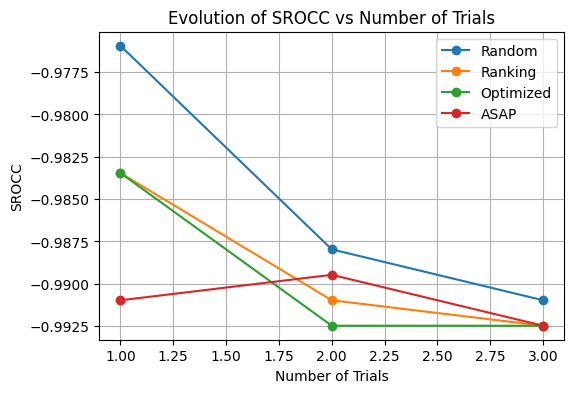

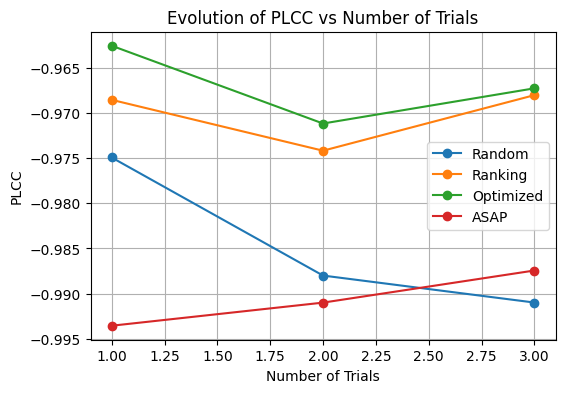

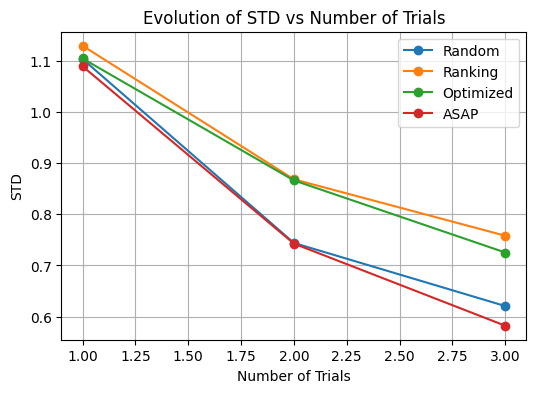

In [15]:
from scipy.stats import spearmanr, pearsonr

nbImages = 20
jodRange = 10
nbTrials = [1, 2, 3]# upto 3

#ground truth scores
groundTruthScores = generateGroundTruthScores(jodRange, nbImages)

results = {
    "Random": {"SROCC": [], "PLCC": [], "STD": []},
    "Ranking": {"SROCC": [], "PLCC": [], "STD": []},
    "Optimized": {"SROCC": [], "PLCC": [], "STD": []},
    "ASAP": {"SROCC": [], "PLCC": [], "STD": []}
}


for trials in nbTrials:
    for algorithm_name, sampling_algo in zip(
        ["Random", "Ranking", "Optimized","ASAP"],
        [randomSampling, rankingBasedSampling, optRankingBasedSampling, asapSampling]
    ):
        # Simulate
        avgJodScores, avgStdScores, _ = monteCarloPwcSim(
            groundTruthScores=groundTruthScores,
            nbTrials=trials,
            observerSimulator=pwcObserverSimulator,
            samplingAlgorithm=sampling_algo
        )
        # print("groundTruthScores ",groundTruthScores)
        # print("***********************************")
        # print("avgJodScores ",avgJodScores)
        # SROCC,PLCC,std
        srocc, _ = spearmanr(groundTruthScores, avgJodScores[-1])
        plcc, _ = pearsonr(groundTruthScores, avgJodScores[-1])
        std = np.mean(avgStdScores)

        results[algorithm_name]["PLCC"].append(plcc)
        results[algorithm_name]["STD"].append(std)
        results[algorithm_name]["SROCC"].append(srocc)


# plt
for metric in ["SROCC", "PLCC", "STD"]:
    plt.figure(figsize=(6, 4))
    for algorithm_name in results.keys():
        plt.plot(nbTrials, results[algorithm_name][metric], label=algorithm_name,marker='o')
    plt.title(f"Evolution of {metric} vs Number of Trials")
    plt.xlabel("Number of Trials")
    plt.ylabel(metric)
    # plt.xticks([1, 2, 3])
    plt.legend()
    plt.grid()
    plt.show()

> A16:

In our experiment, we compute the SROCC and PLCC correlation matrix between the groundtruth and the simulated JOD scores using the 4 sampling algorithims and based on the results:

- **SROCC Observations**:  As SROCC measure the rank based co-relation, a value close to 1 indicates that the simulated scores and ground truth ranking are positively rco-related, while close to -1 indicates they are negatively co-related. From the plot, we can see that SROCC value is negative throughout the trails.
ASAP performs better than other algorithims since it's giving better results even with less no of trails, while on the other hand random sampling is giving the worst as compare to other. And ranking and Optimized ranking performance is almost same and it improves with no of trails, relecting that ranking based algorithims consistently improves with moreno of trails.  

- **PLCC Observations**: PLCC measures the linear co-relations between the ground truth and the simulated scores, so here in our case PLCC is indicating that how close simulated results are to the ground truth. here again the corelation is negative close to -1:
    - adaptive: is better but with lower trails, but it increase over with trails, so to conclude we might not need more trails for adaptive as it can capture relationship with less no of trails.
    - random: random samplying performace increases with no of trails, which conclude random might need more trails for stable/better performance 
    - Ranking and Optimized ranking: what i can conclude for these two sampling algorithims, since they are ranking algorithims and SROCC is rank based correlation so thier performance is better with SROCC, while PLCC which measures the linear corelation between two variables, that's why their results here is lower than other two sampling algorithims

- **Std Observations**: Overall std decreases for all sampling algorithims as the no of trails increases which suggests that with the increasing no of trails, the varriablity in estimating the scores decreases. from plot we see adaptive and random consistently reduces variability, while ranking and optimized ranking struggles becuase they focus more on ranking accuracy, leading to slow reduction in score variability.

> ### Q17: Let's now fix the number of standard trials (a.k.a the number of comparisons) to 1.5, and vary the JOD range of the scene. Plot again the SROCC, PLC and STD according to a varing JOD (2-20), for your 4 sampling algorithms. How do you interpret the results? Regarding the std, which sapling algorithm is better? why do you think this is the case?

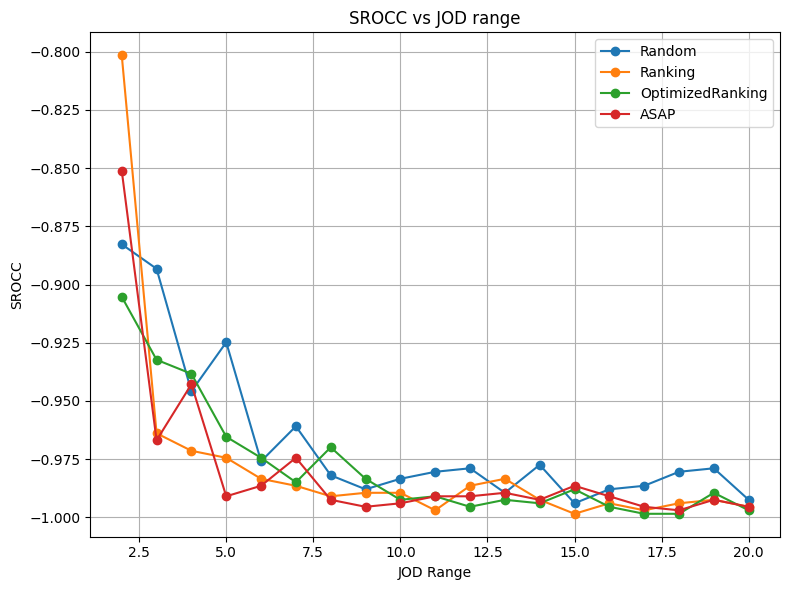

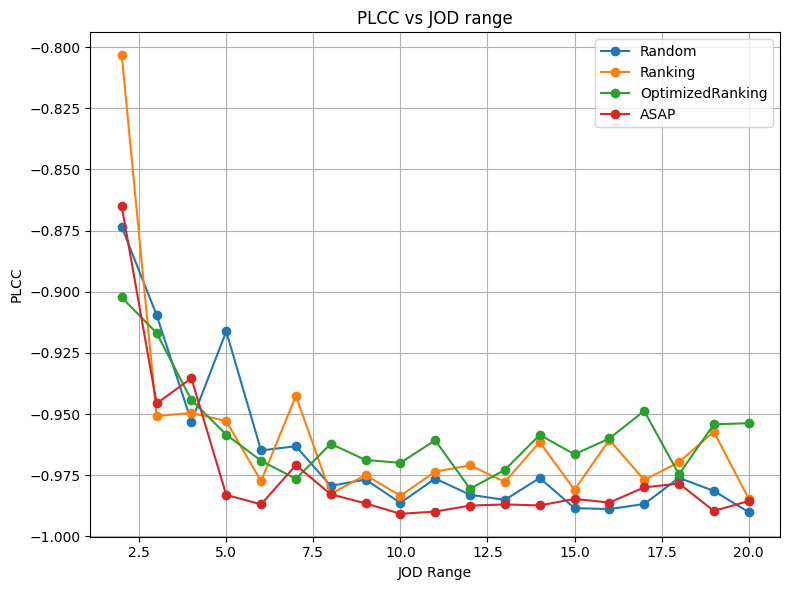

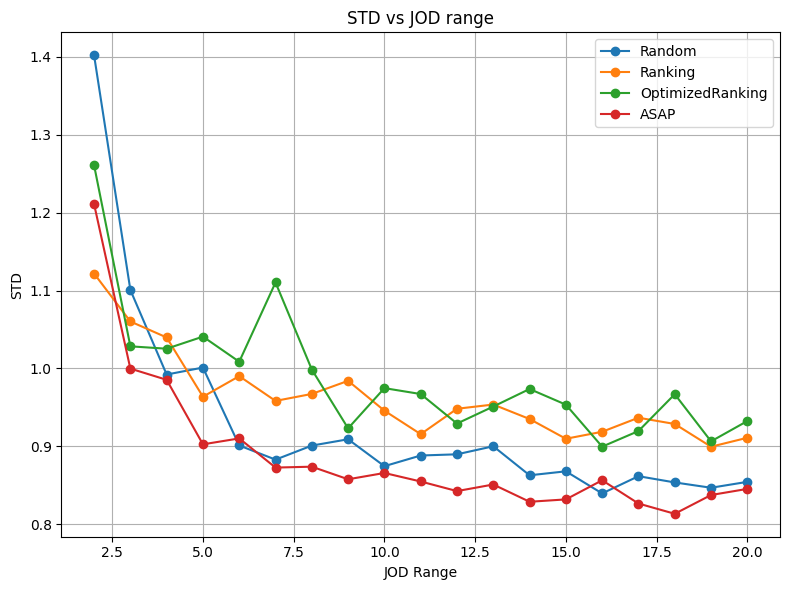

In [17]:
nbImages = 20
nbTrials = 1.5
jodRanges = np.arange(2, 21)
sampling_algorithms = {
    "Random": randomSampling,
    "Ranking": rankingBasedSampling,
    "OptimizedRanking": optRankingBasedSampling,
    "ASAP":asapSampling
}


results = {
    "Random": {"SROCC": [], "PLCC": [], "STD": []},
    "Ranking": {"SROCC": [], "PLCC": [], "STD": []},
    "OptimizedRanking": {"SROCC": [], "PLCC": [], "STD": []},
    "ASAP": {"SROCC": [], "PLCC": [], "STD": []}
}


for algorithm, sampling_func in sampling_algorithms.items():
    for jodRange in jodRanges:

        groundTruthScores = generateGroundTruthScores(jodRange=jodRange, nbImages=nbImages) # Ground truth scores for the current JOD range

        # monte carlo simulation
        avgJodScores, avgStdScores, _ = monteCarloPwcSim(
            groundTruthScores=groundTruthScores,
            nbTrials=nbTrials,
            observerSimulator=pwcObserverSimulator,
            samplingAlgorithm=sampling_func
        )


        srocc, _ = spearmanr(groundTruthScores, avgJodScores[-1])  #last batch
        plcc, _ = pearsonr(groundTruthScores, avgJodScores[-1])#last batch
        std = np.mean(avgStdScores)  # take average std for all batches

        results[algorithm]["PLCC"].append(plcc)
        results[algorithm]["SROCC"].append(srocc)
        results[algorithm]["STD"].append(std)



for metric in ["SROCC", "PLCC", "STD"]:
    plt.figure(figsize=(8, 6))
    for algorithm, data in results.items():
        plt.plot(jodRanges, data[metric], label=algorithm, marker='o', linestyle='-')
    plt.title(f"{metric} vs JOD range")
    plt.xlabel("JOD Range")
    plt.ylabel(metric)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


> A17: 

- **SROCC vs JOD Range**:
the negative corelation increases(getting close to -1) as the JOD range increases for all algorithms. that suggests the difficulty is decreasing. ASAP consistently maintains the highest(negative) correlation with its ablity in adapting to a broader JOD range. however, ranking and optimized ranking also perform well due to their compatibility with rank based metrics, while Random Sampling performs comparatively some how poor than others. Also we noticed than after JOD 10 the corelation does not changes much, this might be because we only have 20 samples and it already goes very close to -1 when JOD is 10. 

- **PLCC vs JOD Range**:
similar to SROCC, PLCC increases negatively with an increasing JOD range for all algorithms,  with ASAP maintains higher correlation with increasing JOD ranges, Rnaodm performance improves with increasing JOD, but is not much better initially. While ranking algorithims also some how struggles initially at low JOD values, as we have also seen in first experiment. And same as SROCC, after JOD 10 the corelation does not changes much. 

- **STD vs JOD Range**:
    The lower STD of ASAP means it reduces uncertainty better because it focuses on pairs with similar scores, making its predictions more stable.ASAP has the lowest standard deviation across all JOD ranges, showing it provides the most stable predictions.
    Random goes close to ASAP as JOD increases showing that with the wider range of ground truth the varraiation decreases in random sampling results but initially it std is higher.
    while Optimized Ranking and ranking has the most variability compare to the other two, same as the above experiment.


> ### Q18: What are the conclusions you can make from this experiment? What approach performs better and in what situtations?

> #### A18:


**Conclusions from both Experiment**

- Mostly ASAP and sometimes perform better than other methods Random, Ranking, and OptimizedRanking across all measures (SROCC, PLCC, STD).

- ASAP Stands Out for Stability, ASAP shows the lowest STD across different JOD ranges and trials, meaning it provides the most stable predictions by focusing on uncertain comparisons.

- Both ASAP and OptimizedRanking maintain higher SROCC and PLCC, even when the JOD range increases, showing they can handle different and wider score distributions.

**Best Approach for Different Scenarios**

- When Stability is Most Important, best aproach would be ASAP becuase ASAP targets pairs with close scores, reducing uncertainty and achieving the lowest STD, making it the best choice for situations that require stable and reliable predictions.

- When High Correlation is Needed,  ASAP or OptimizedRanking Both methods keep strong SROCC and PLCC, making them effective at achieving accurate ranking and linear relationships.

-  For Tasks that focus more on efficiency, ranking since it works well with moderate score diversity and offers a simpler option when efficiency is important.


**Conclusion**
- For most pairwise comparison tasks, ASAP is might be the best choice due to its stability and adaptability moreover OptimizedRanking and Rnking also seems to be good alternatives. on the other hand Random  seems to inefficient and may not perform well on real world dataset, since here we only tested with simple data.